# Weather Data Prediction 
I chose this project to predict the weather near Jackson, MI. This is where fsae competion is in the summer.
The weather data came from https://nowdata.rcc-acis.org/grr/. I collected by hand and combined the data from 2018 to 2023. 

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

weatherIn = pd.read_csv('weatherCSV.csv')
weatherIn['Precip'].replace('T', np.nan, inplace=True)
weatherIn['Precip'] = pd.to_numeric(weatherIn['Precip'], errors='coerce')
mean_precip = weatherIn['Precip'].mean()
weatherIn['Precip'].fillna(mean_precip, inplace=True)
# Create data from only 2018
weatherIn['Date'] = pd.to_datetime(weatherIn['Date'])


print(weatherIn.head())

        Date  MaxTmp  MinTmp  AvgTmp  Depart  HDD  CDD  Precip NewSnow   
0 2018-05-01      83      55    69.0    15.9    0    4    0.00       0  \
1 2018-05-02      84      64    74.0    20.5    0    9    0.03       0   
2 2018-05-03      72      59    65.5    11.7    0    1    0.57       0   
3 2018-05-04      72      55    63.5     9.3    1    0    0.12       0   
4 2018-05-05      80      56    68.0    13.4    0    3    0.00       0   

   SnowDep  
0        0  
1        0  
2        0  
3        0  
4        0  


C:\Users\fantu\AppData\Local\Temp\ipykernel_172696\4066763745.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weatherIn['Date'] = pd.to_datetime(weatherIn['Date'])


# Looking at Data Distrobutions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


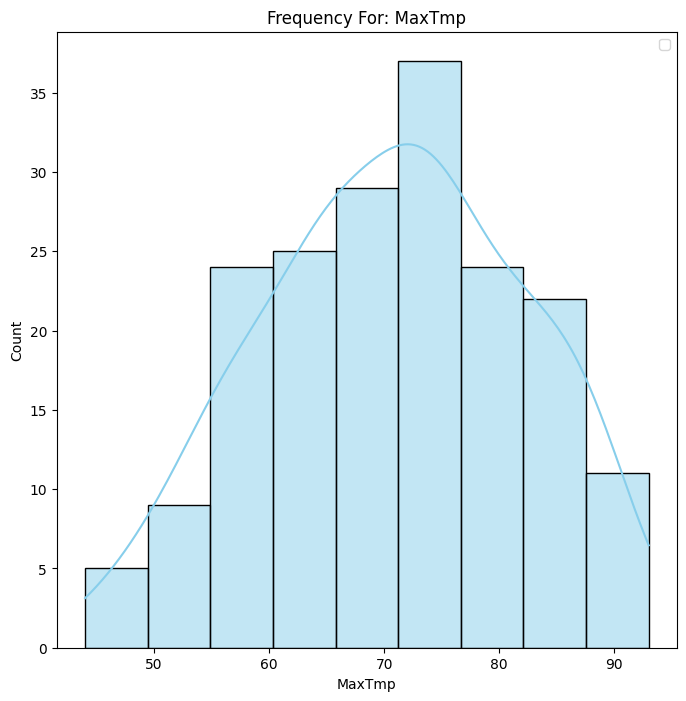

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


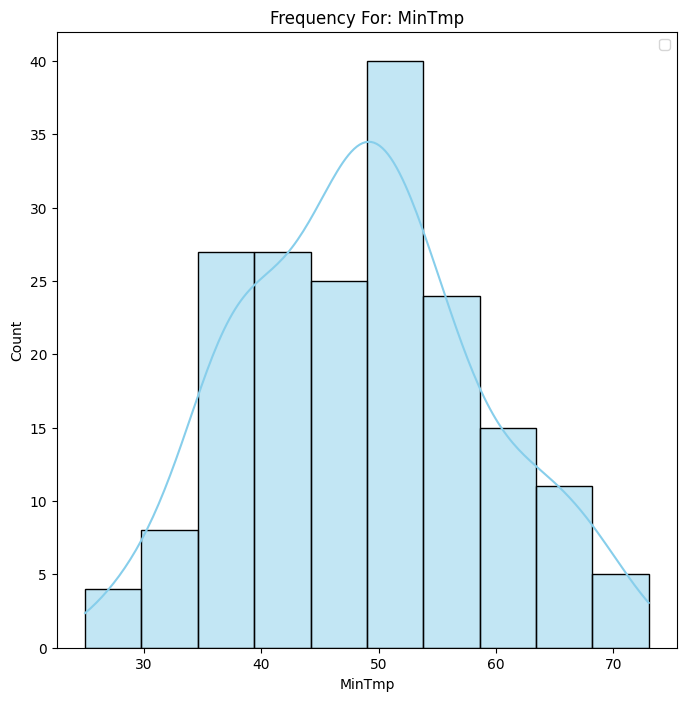

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


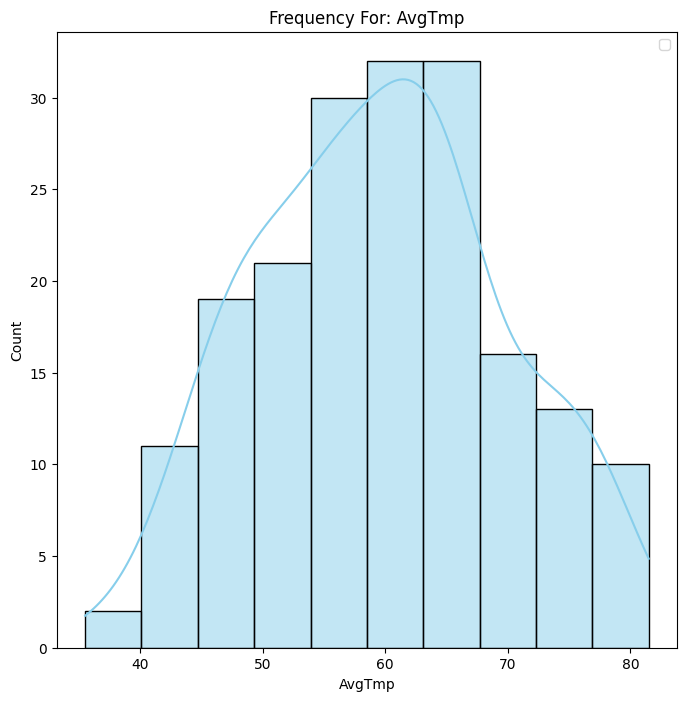

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


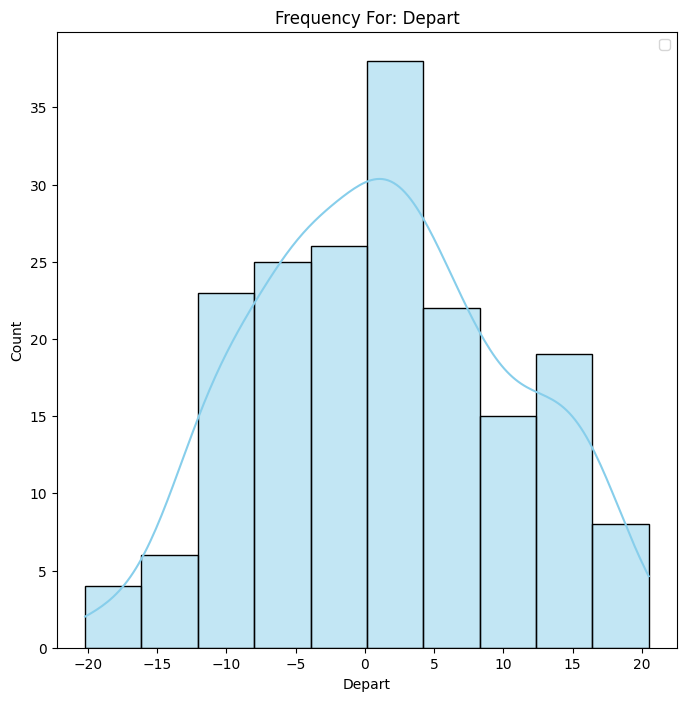

<Figure size 640x480 with 0 Axes>

In [205]:
datCols = ['MaxTmp', 'MinTmp', 'AvgTmp','Depart']

for cols in datCols:
    plt.figure(figsize = (8, 8))
    sns.histplot(weatherIn[cols], kde = True, color = 'skyblue')
    plt.xlabel(cols)
    plt.title("Frequency For: " + cols)
    plt.legend()
    plt.show()

plt.tight_layout()

# Model Packages and Training

# --> Experiment 1: Linear Regression

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = weatherIn[['MaxTmp', 'Depart', 'Precip']]
y = weatherIn['AvgTmp']

In [207]:
# Creating the train and test sets and starting the model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .05, random_state = 40, shuffle = True)
model = LinearRegression()

In [208]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse =  mean_squared_error(y_test, y_pred)
rmse =  np.sqrt(mse)

print('Mean Absolute Error:', + mae)
print('Mean Square Error:', + mse)
print('Root Mean Square Error:', + rmse)

Mean Absolute Error: 1.990015292131264
Mean Square Error: 5.145599954529685
Root Mean Square Error: 2.2683914905786624


# Using the Model With Linear Best Fit

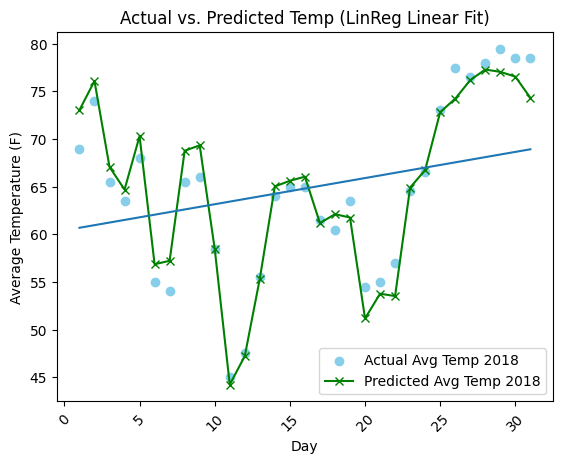

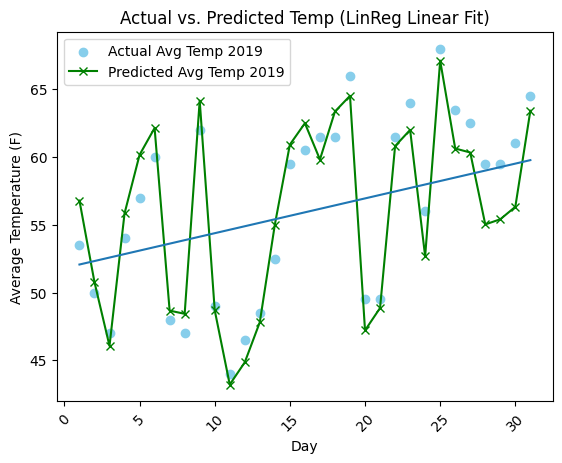

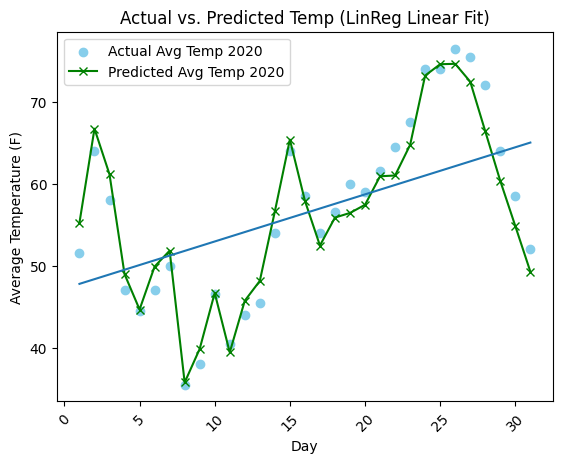

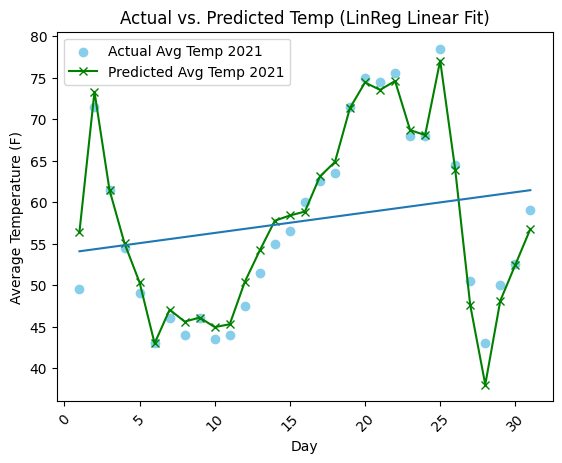

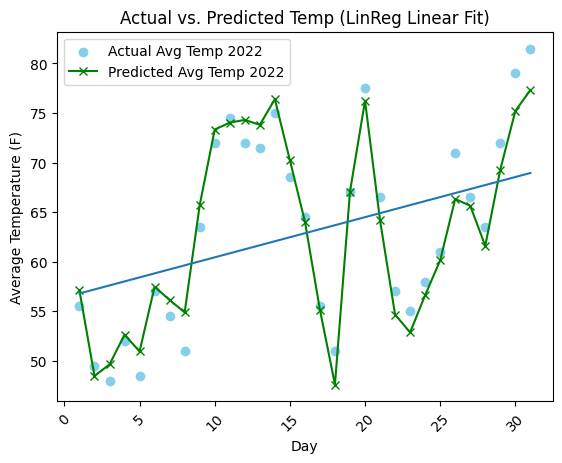

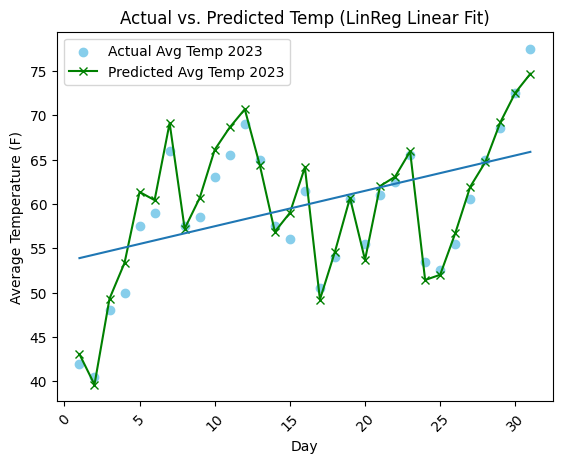

In [209]:
weatherIn['Date'] = pd.to_datetime(weatherIn['Date'])
weatherIn['Year'] = weatherIn['Date'].dt.year
weatherIn['DayOfMonth'] = weatherIn['Date'].dt.day

predictionsByYear = pd.DataFrame()
    
for year in weatherIn['Year'].unique():
    
    yearData = weatherIn[weatherIn['Year'] == year]
    yearPred = yearData[['MaxTmp', 'Depart', 'Precip']]
    predTest = model.predict(yearPred)

    # Predict temperatures using the linear regression model
    plt.scatter(yearData['DayOfMonth'], yearData['AvgTmp'], label=f'Actual Avg Temp {year}', marker='o', color = 'skyblue')

    # Plot predicted average temperature
    plt.plot(yearData['DayOfMonth'], predTest, label=f'Predicted Avg Temp {year}', marker='x', color = 'green')
    plt.plot(np.unique(yearData['DayOfMonth']), np.poly1d(np.polyfit(yearData['DayOfMonth'], predTest, 1))(np.unique(yearData['DayOfMonth'])))
    
    # Set labels and title
    plt.xlabel('Day')
    plt.ylabel('Average Temperature (F)')
    plt.title('Actual vs. Predicted Temp (LinReg Linear Fit)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend()

    # Show plot
    plt.show()

# Using the Model With Polynomial Best Fit

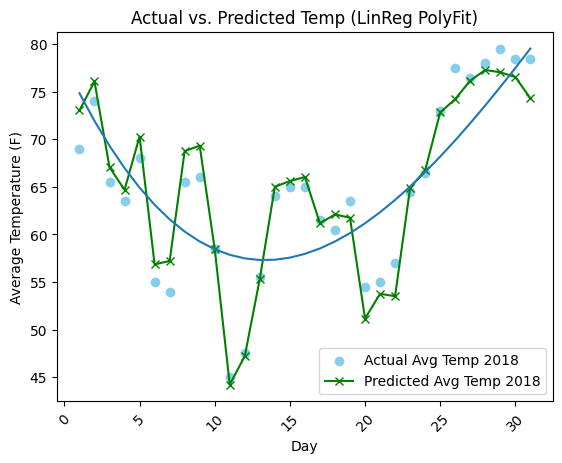

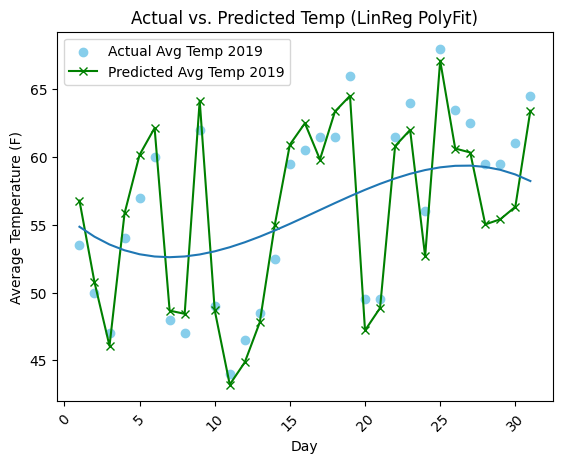

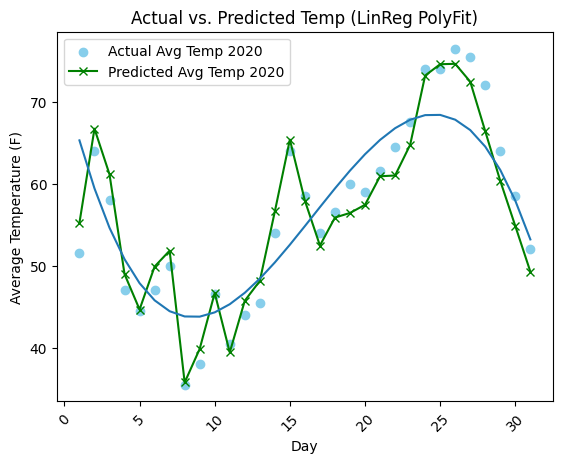

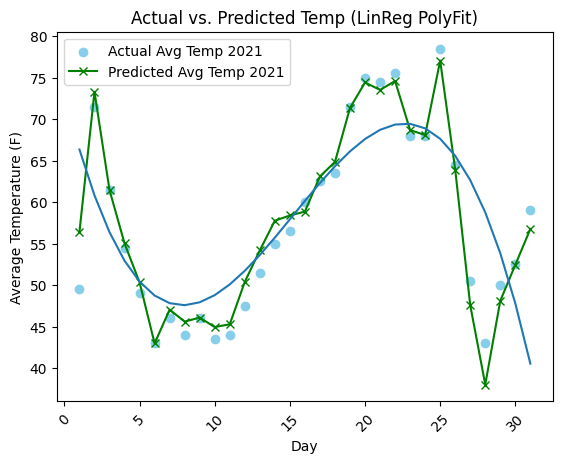

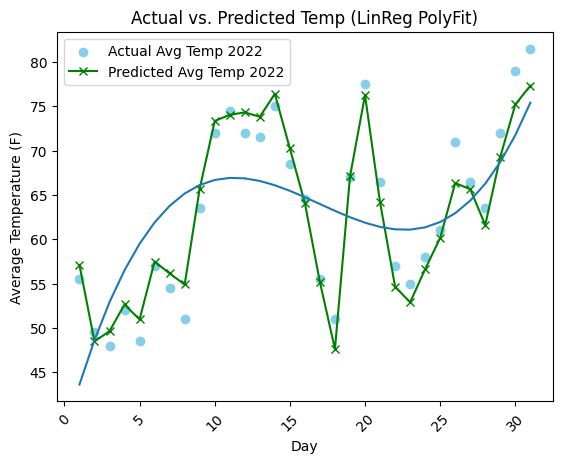

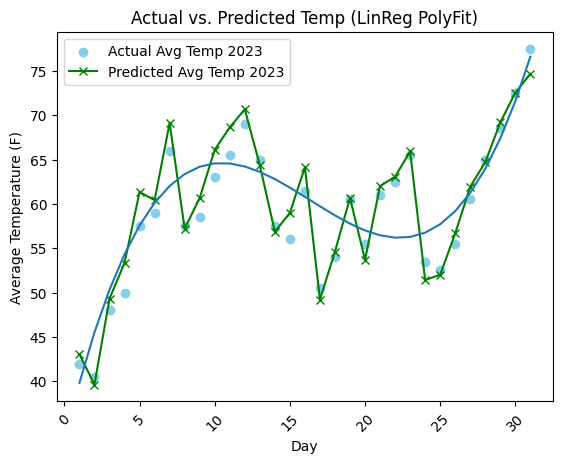

In [210]:
weatherIn['Date'] = pd.to_datetime(weatherIn['Date'])
weatherIn['Year'] = weatherIn['Date'].dt.year
weatherIn['DayOfMonth'] = weatherIn['Date'].dt.day

predictionsByYear = pd.DataFrame()
    
for year in weatherIn['Year'].unique():
    
    yearData = weatherIn[weatherIn['Year'] == year]
    yearPred = yearData[['MaxTmp', 'Depart', 'Precip']]
    predTest = model.predict(yearPred)

    # Predict temperatures using the linear regression model
    plt.scatter(yearData['DayOfMonth'], yearData['AvgTmp'], label=f'Actual Avg Temp {year}', marker='o', color = 'skyblue')

    # Plot predicted average temperature
    plt.plot(yearData['DayOfMonth'], predTest, label=f'Predicted Avg Temp {year}', marker='x', color = 'green')
    plt.plot(np.unique(yearData['DayOfMonth']), np.poly1d(np.polyfit(yearData['DayOfMonth'], predTest, 3))(np.unique(yearData['DayOfMonth'])))
    
    # Set labels and title
    plt.xlabel('Day')
    plt.ylabel('Average Temperature (F)')
    plt.title('Actual vs. Predicted Temp (LinReg PolyFit)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend()

    # Show plot
    plt.show()

# --> Experiment 2: Random Forest Regression

In [211]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

# Evaluation metrics
mae_rf = mean_absolute_error(y_test, rf_prediction)
mse_rf =  mean_squared_error(y_test, rf_prediction)
rmse_rf =  np.sqrt(mse_rf)

print('Mean Absolute Error:', + mae_rf)
print('Mean Square Error:', + mse_rf)
print('Root Mean Square Error:', + rmse_rf)

Mean Absolute Error: 1.7130000000000003
Mean Square Error: 4.263764999999997
Root Mean Square Error: 2.064888616850797


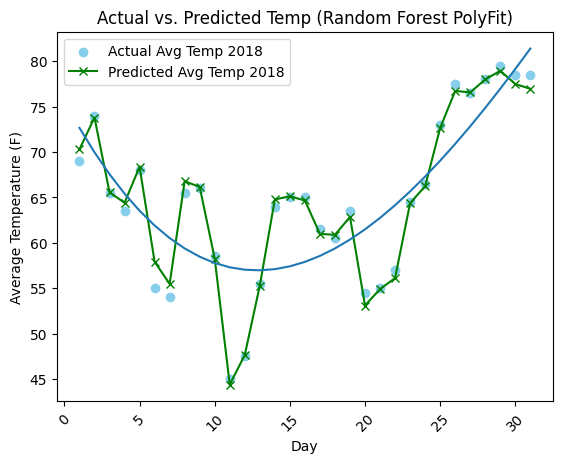

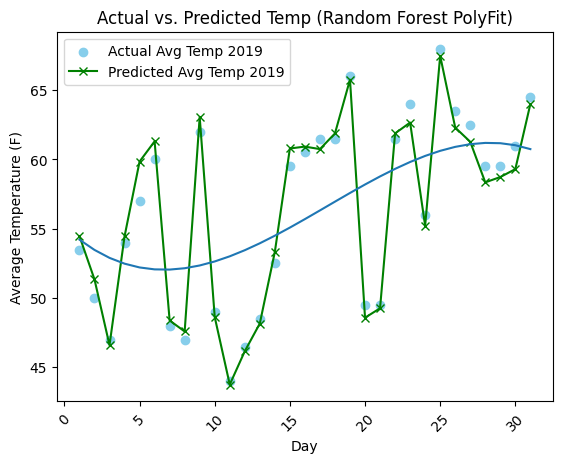

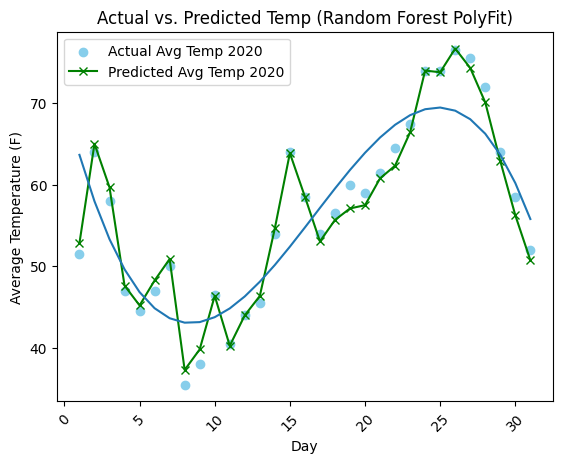

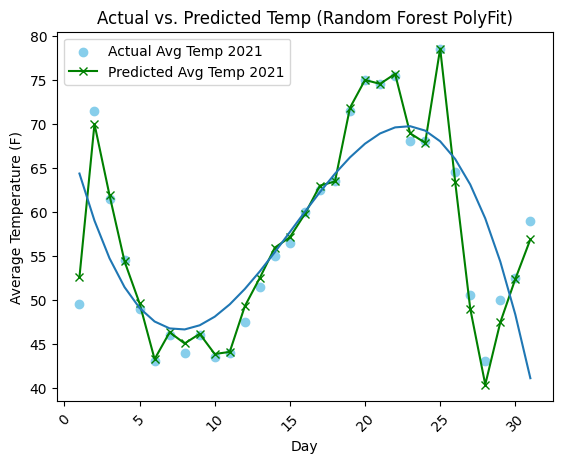

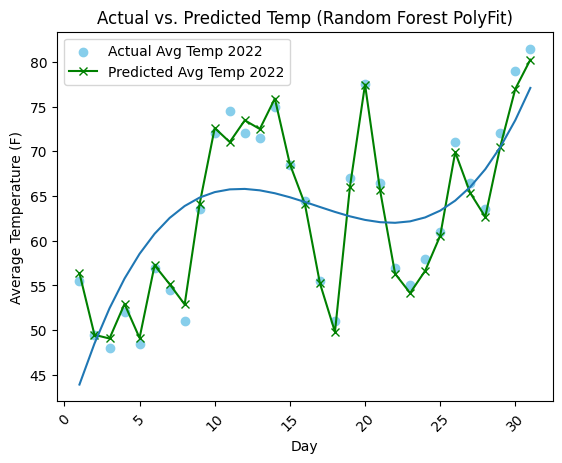

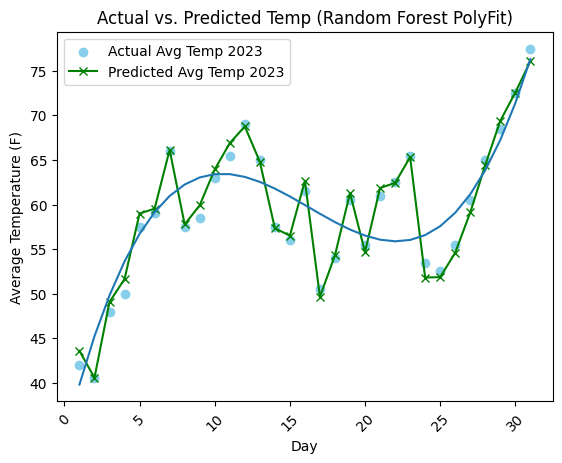

In [212]:
weatherIn['Date'] = pd.to_datetime(weatherIn['Date'])
weatherIn['Year'] = weatherIn['Date'].dt.year
weatherIn['DayOfMonth'] = weatherIn['Date'].dt.day

predictionsByYear = pd.DataFrame()
    
for year in weatherIn['Year'].unique():
    
    yearData = weatherIn[weatherIn['Year'] == year]
    yearPred = yearData[['MaxTmp', 'Depart', 'Precip']]
    predTest = rf.predict(yearPred)

    # Predict temperatures using the linear regression model
    plt.scatter(yearData['DayOfMonth'], yearData['AvgTmp'], label=f'Actual Avg Temp {year}', marker='o', color = 'skyblue')

    # Plot predicted average temperature
    plt.plot(yearData['DayOfMonth'], predTest, label=f'Predicted Avg Temp {year}', marker='x', color = 'green')
    plt.plot(np.unique(yearData['DayOfMonth']), np.poly1d(np.polyfit(yearData['DayOfMonth'], predTest, 3))(np.unique(yearData['DayOfMonth'])))
    
    # Set labels and title
    plt.xlabel('Day')
    plt.ylabel('Average Temperature (F)')
    plt.title('Actual vs. Predicted Temp (Random Forest PolyFit)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend()

    # Show plot
    plt.show()

# --> Experiment 3: Decision Tree Regression

In [213]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 100)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

mae_rf = mean_absolute_error(y_test, rf_prediction)
mse_rf =  mean_squared_error(y_test, rf_prediction)
rmse_rf =  np.sqrt(mse_rf)

print('Mean Absolute Error:', + mae_rf)
print('Mean Square Error:', + mse_rf)
print('Root Mean Square Error:', + rmse_rf)

Mean Absolute Error: 1.7130000000000003
Mean Square Error: 4.263764999999997
Root Mean Square Error: 2.064888616850797


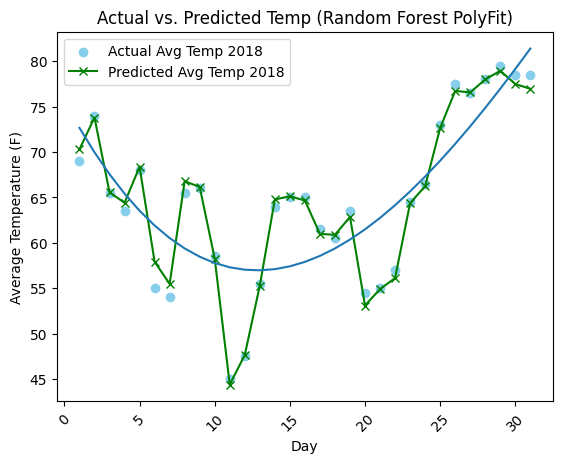

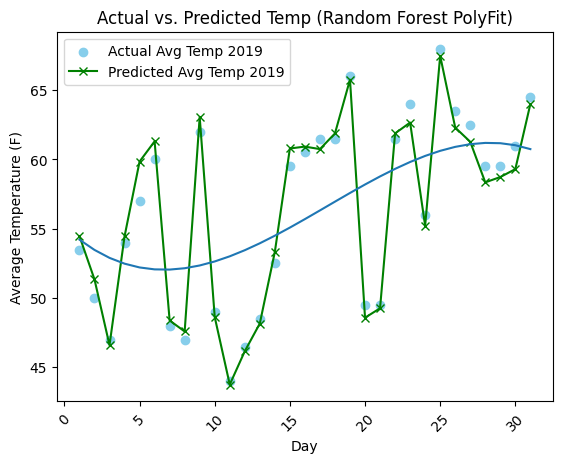

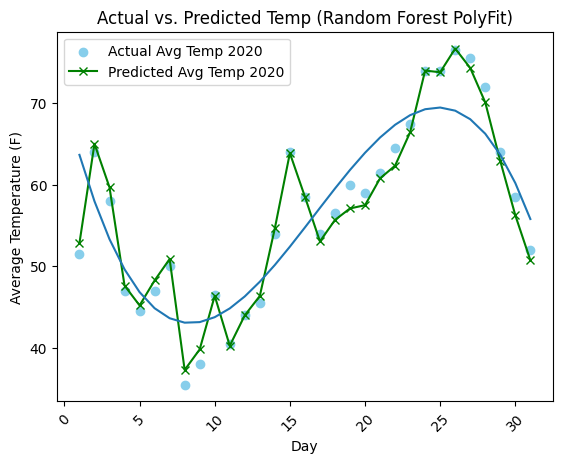

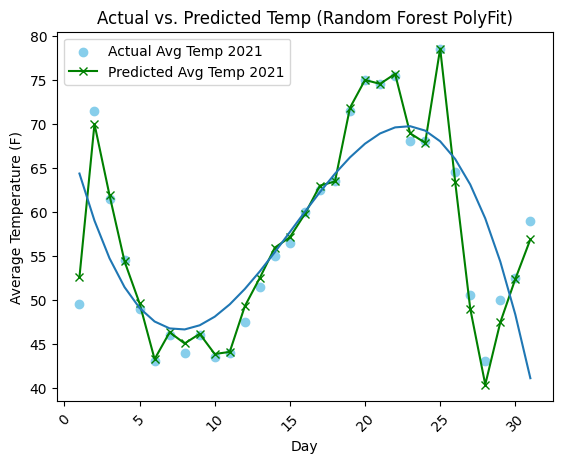

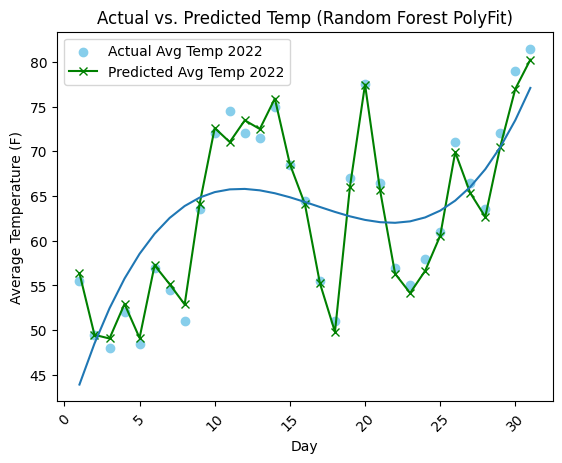

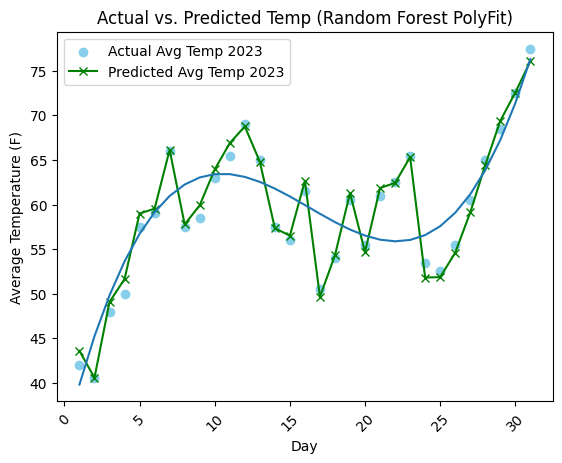

In [214]:
weatherIn['Date'] = pd.to_datetime(weatherIn['Date'])
weatherIn['Year'] = weatherIn['Date'].dt.year
weatherIn['DayOfMonth'] = weatherIn['Date'].dt.day

predictionsByYear = pd.DataFrame()
    
for year in weatherIn['Year'].unique():
    
    yearData = weatherIn[weatherIn['Year'] == year]
    yearPred = yearData[['MaxTmp', 'Depart', 'Precip']]
    predTest = rf.predict(yearPred)

    # Predict temperatures using the linear regression model
    plt.scatter(yearData['DayOfMonth'], yearData['AvgTmp'], label=f'Actual Avg Temp {year}', marker='o', color = 'skyblue')

    # Plot predicted average temperature
    plt.plot(yearData['DayOfMonth'], predTest, label=f'Predicted Avg Temp {year}', marker='x', color = 'green')
    plt.plot(np.unique(yearData['DayOfMonth']), np.poly1d(np.polyfit(yearData['DayOfMonth'], predTest, 3))(np.unique(yearData['DayOfMonth'])))
    
    # Set labels and title
    plt.xlabel('Day')
    plt.ylabel('Average Temperature (F)')
    plt.title('Actual vs. Predicted Temp (Random Forest PolyFit)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend()

    # Show plot
    plt.show()